In [26]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras import backend as k

In [27]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [28]:
x_train.shape

(60000, 28, 28)

In [29]:
img_rows, img_cols = 28, 28

if k.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    inpx = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    inpx = (img_rows, img_cols, 1)
    
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [30]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [31]:
inpx = Input(shape = inpx)
layer1 = Conv2D(32, kernel_size=(3,3), activation='relu')(inpx)
layer2 = Conv2D(64, (3,3), activation='relu')(layer1)
#layer3 = MaxPooling2D(pool_size=(3,3))(layer2)
layer3 = MaxPooling2D(pool_size=(2,2))(layer2)
layer4 = Dropout(0.5)(layer3)
layer5 = Flatten()(layer3)
layer6 = Dense(100, activation='relu')(layer5)
layer7 = Dense(10, activation='softmax')(layer6)

In [32]:
model = Model([inpx], layer7)
model.compile(optimizer = keras.optimizers.Adadelta(), loss = keras.losses.categorical_crossentropy, metrics = ['accuracy'])
mod_log = model.fit(x_train, y_train, batch_size = 20, epochs = 10, verbose = 1, validation_data = (x_test, y_test))

Epoch 1/10
3000/3000 [==============================] - 142s 46ms/step - loss: 2.1064 - accuracy: 0.4745 - val_loss: 1.8342 - val_accuracy: 0.6823
Epoch 2/10
3000/3000 [==============================] - 140s 47ms/step - loss: 1.4194 - accuracy: 0.7550 - val_loss: 0.9903 - val_accuracy: 0.8056
Epoch 3/10
3000/3000 [==============================] - 131s 44ms/step - loss: 0.7759 - accuracy: 0.8199 - val_loss: 0.5933 - val_accuracy: 0.8514
Epoch 4/10
3000/3000 [==============================] - 145s 48ms/step - loss: 0.5420 - accuracy: 0.8546 - val_loss: 0.4619 - val_accuracy: 0.8748
Epoch 5/10
3000/3000 [==============================] - 130s 43ms/step - loss: 0.4509 - accuracy: 0.8727 - val_loss: 0.3999 - val_accuracy: 0.8895
Epoch 6/10
3000/3000 [==============================] - 123s 41ms/step - loss: 0.4038 - accuracy: 0.8843 - val_loss: 0.3652 - val_accuracy: 0.8975
Epoch 7/10
3000/3000 [==============================] - 144s 48ms/step - loss: 0.3746 - accuracy: 0.8923 - val_loss: 0

In [33]:
score = model.evaluate(x_test, y_test, verbose = 0)
print('Test Loss = ', score[0])
print('Test Accuracy = ', score[1])

Test Loss =  0.3013472557067871
Test Accuracy =  0.9150000214576721


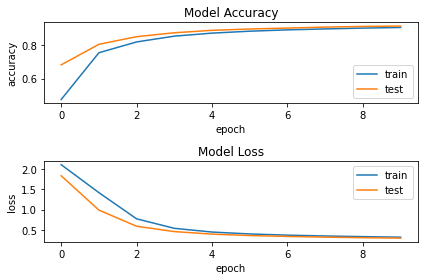

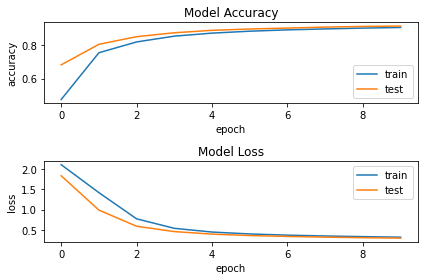

In [35]:
import matplotlib.pyplot as plt
import os

fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(mod_log.history['accuracy'])
plt.plot(mod_log.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(mod_log.history['loss'])
plt.plot(mod_log.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()
fig